<a href="https://colab.research.google.com/github/Bala534/EDSML-Week3/blob/main/EDA(Week_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [ ]:
data = pd.read_csv("covid_19_india.csv")
data['Date'] =  pd.to_datetime(data['Date'] ,format ='%Y-%m-%d')
data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       14150 non-null  int64         
 1   Date                      14150 non-null  datetime64[ns]
 2   Time                      14150 non-null  object        
 3   State/UnionTerritory      14150 non-null  object        
 4   ConfirmedIndianNational   14150 non-null  object        
 5   ConfirmedForeignNational  14150 non-null  object        
 6   Cured                     14150 non-null  int64         
 7   Deaths                    14150 non-null  int64         
 8   Confirmed                 14150 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 995.0+ KB


In [ ]:
data.shape

(14150, 9)

In [ ]:
data.describe()

,Sno,Cured,Deaths,Confirmed
count,14150.00000,1.415000e+04,14150.000000,1.415000e+04
mean,7075.50000,1.540126e+05,2471.903816,1.681579e+05
std,4084.89749,3.105335e+05,6607.935316,3.384063e+05
min,1.00000,0.000000e+00,0.000000,0.000000e+00
25%,3538.25000,1.225250e+03,10.000000,2.355250e+03
50%,7075.50000,1.677250e+04,318.000000,2.102550e+04
75%,10612.75000,1.782590e+05,1915.000000,2.059975e+05
max,14150.00000,3.330747e+06,62479.000000,4.094840e+06


In [ ]:
data.isna().sum().sum()

0

StateWise Analysis

In [ ]:
state_wise = data.groupby('State/UnionTerritory')['Confirmed','Cured','Deaths'].sum().reset_index()
state_wise["Death_percentage"] = ((state_wise["Deaths"] / state_wise["Confirmed"]) * 100)
state_wise.style.background_gradient(cmap='magma')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,State/UnionTerritory,Confirmed,Cured,Deaths,Death_percentage
0,Andaman and Nicobar Islands,1161624,1095239,14794,1.273562
1,Andhra Pradesh,205627560,195009537,1684138,0.819023
2,Arunachal Pradesh,3582775,3335949,10816,0.301889
3,Assam,51095731,47806964,231434,0.452942
4,Bihar,59502973,56326201,325733,0.547423
5,Cases being reassigned to states,345565,0,0,0.000000
6,Chandigarh,4497154,4098897,67640,1.504062
7,Chhattisgarh,60074333,53723225,694144,1.155475
8,Dadra and Nagar Haveli and Daman and Diu,866005,817775,582,0.067205
9,Daman & Diu,2,0,0,0.000000


In [ ]:
px.bar(x=state_wise.nlargest(10,"Confirmed")["State/UnionTerritory"],
       y = state_wise.nlargest(10,"Confirmed")["Confirmed"],
       color_discrete_sequence=px.colors.diverging.Picnic,
       title="Top 10 states with highest number of Confirmed cases")

In [ ]:
px.bar(x=state_wise.nlargest(10,"Cured")["State/UnionTerritory"],
       y = state_wise.nlargest(10,"Cured")["Cured"],
       color_discrete_sequence=px.colors.sequential.Sunset,
       title="Top 10 states with highest number of Cured cases")

In [ ]:
px.bar(x=state_wise.nlargest(10,"Deaths")["State/UnionTerritory"],
       y = state_wise.nlargest(10,"Deaths")["Deaths"],
       color_discrete_sequence=px.colors.diverging.curl,
       title="Top 10 states with highest number of Deaths")

In [ ]:
px.bar(x=state_wise.nlargest(10,"Death_percentage")["State/UnionTerritory"],
       y = state_wise.nlargest(10,"Death_percentage")["Death_percentage"],
       color_discrete_sequence=px.colors.diverging.Portland,
       title="Top 10 states with highest of Death percentage")

MonthWise Analysis

In [ ]:
month_wise = data.groupby(pd.Grouper(key='Date',freq='M')).sum()

month_wise = month_wise.drop(['Sno'], axis = 1)
month_wise['Date'] = month_wise.index

first_column = month_wise.pop('Date')
month_wise.insert(0, 'Date', first_column)

index = [x for x in range(len(month_wise))]
month_wise['index'] = index
month_wise = month_wise.set_index('index')

second_column = month_wise.pop('Confirmed')
month_wise.insert(1, 'Confirmed', second_column)
month_wise["Death_percentage"] = ((month_wise["Deaths"] / month_wise["Confirmed"]) * 100)
month_wise.style.background_gradient(cmap='twilight_shifted')

,Date,Confirmed,Cured,Deaths,Death_percentage
index,,,,,
0,2020-01-31 00:00:00,2,0,0,0.000000
1,2020-02-29 00:00:00,86,0,0,0.000000
2,2020-03-31 00:00:00,9687,808,202,2.085269
3,2020-04-30 00:00:00,422442,75443,13270,3.141260
4,2020-05-31 00:00:00,2938234,1133341,89834,3.057415
5,2020-06-30 00:00:00,10558374,5668946,319690,3.027834
6,2020-07-31 00:00:00,31726501,19980130,793511,2.501098
7,2020-08-31 00:00:00,80749620,58580895,1553468,1.923808
8,2020-09-30 00:00:00,149113758,118592934,2443374,1.638597


In [ ]:
fig = px.bar(month_wise, x='Date', y='Confirmed',
             hover_data=['Cured', 'Deaths'], color='Date',
             labels={'Date':'Date(monthwise)'}, height=400,
             title="Monthwise Increase in Confirmed cases")
fig.show()

In [ ]:
fig = px.bar(month_wise, x='Date', y='Cured',
             hover_data=['Confirmed','Deaths'], color='Date',
             labels={'Date':'Date(monthwise)'},
             title="Monthwise Increase in Cured cases")
fig.show()

In [ ]:
fig = px.bar(month_wise, x='Date', y='Deaths',
             hover_data=['Confirmed','Cured'], color='Date',
             labels={'Date':'Date(monthwise)'},
             title="Monthwise Increase in Deaths cases")
fig.show()

In [ ]:
fig = px.bar(month_wise , 
             x='Date', 
             y='Death_percentage' ,
             hover_data=['Confirmed','Deaths'],color='Date',
             labels={'Death_percentage':'Death percentage'},
             title="Top 10 states with highest of Death percentage")
fig.show()

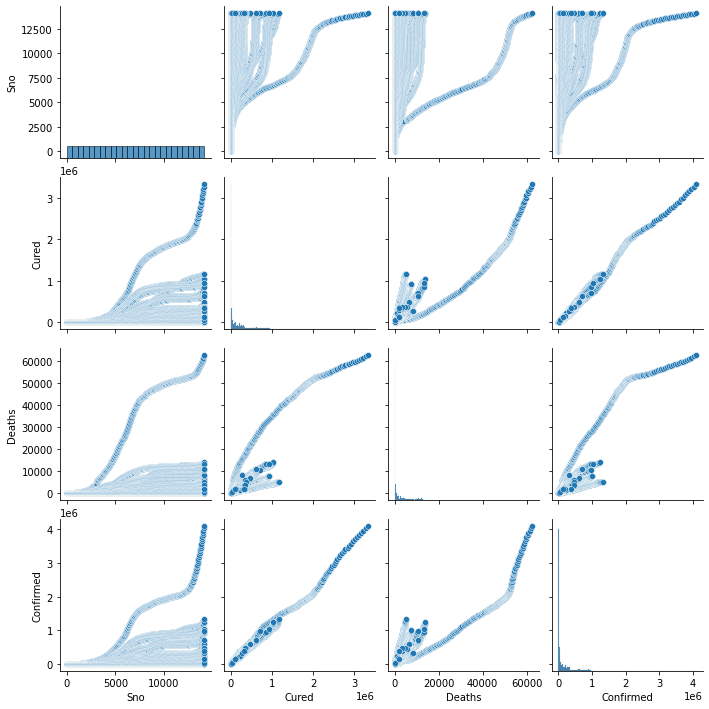

In [ ]:
sns.pairplot(data)